**Scraping Data**

In [1]:
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

In [2]:
# Setup selenium
options = Options()
options.headless = True  # Run browser in headless mode
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [3]:
base_url = 'https://www.weforum.org/agenda/?page='
num_pages = 20  # Number of pages you want to scrape

In [4]:
results = []
for page in range(1, num_pages + 1):
    url = base_url + str(page)
    print(f"Scraping page {page}: {url}")
    driver.get(url)

    # Tunggu sebentar agar halaman sepenuhnya dimuat
    time.sleep(3)

    # Mengambil elemen artikel
    articles = driver.find_elements(By.CSS_SELECTOR, 'article.wef-1rl6rhs')

    for article in articles:
        try:
            category = article.find_element(By.CSS_SELECTOR, 'a.chakra-badge').text.strip()
        except:
            category = 'N/A'
        
        try:
            title = article.find_element(By.CSS_SELECTOR, 'a.chakra-link.wef-1c7l3mo').text.strip()
        except:
            title = 'N/A'
        
        try:
            description = article.find_element(By.CSS_SELECTOR, 'div.wef-1c4gmja').text.strip()
        except:
            description = 'N/A'
        
        try:
            author_info = article.find_element(By.CSS_SELECTOR, 'div.wef-1bf8j10')
            authors = author_info.find_element(By.CSS_SELECTOR, 'p.chakra-text.wef-kefhaq').text.strip()
            date = author_info.find_element(By.CSS_SELECTOR, 'p.chakra-text.wef-1iho44l').text.strip()
        except:
            authors = 'N/A'
            date = 'N/A'
        
        results.append({
            'kategori': category,
            'judul': title,
            'deskripsi': description,
            'penulis': authors,
            'tanggal': date
        })

Scraping page 1: https://www.weforum.org/agenda/?page=1
Scraping page 2: https://www.weforum.org/agenda/?page=2
Scraping page 3: https://www.weforum.org/agenda/?page=3
Scraping page 4: https://www.weforum.org/agenda/?page=4
Scraping page 5: https://www.weforum.org/agenda/?page=5
Scraping page 6: https://www.weforum.org/agenda/?page=6
Scraping page 7: https://www.weforum.org/agenda/?page=7
Scraping page 8: https://www.weforum.org/agenda/?page=8
Scraping page 9: https://www.weforum.org/agenda/?page=9
Scraping page 10: https://www.weforum.org/agenda/?page=10
Scraping page 11: https://www.weforum.org/agenda/?page=11
Scraping page 12: https://www.weforum.org/agenda/?page=12
Scraping page 13: https://www.weforum.org/agenda/?page=13
Scraping page 14: https://www.weforum.org/agenda/?page=14
Scraping page 15: https://www.weforum.org/agenda/?page=15
Scraping page 16: https://www.weforum.org/agenda/?page=16
Scraping page 17: https://www.weforum.org/agenda/?page=17
Scraping page 18: https://www.we

In [5]:
# Menyimpan hasil ke file CSV
csv_file = 'weforum_articles_all_pages.csv'
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['kategori', 'judul', 'deskripsi', 'penulis', 'tanggal'])
    writer.writeheader()
    for result in results:
        writer.writerow(result)

print(f"Data berhasil disimpan ke {csv_file}")

driver.quit()

Data berhasil disimpan ke weforum_articles_all_pages.csv


**Klasifikasi Kategori**

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
file_path = "C:/Users/ASUS/Documents/Portofolio Data Science/Berita/weforum_articles_all_pages.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,kategori,judul,deskripsi,penulis,tanggal
0,BUSINESS,"5 ways to build innovation cultures at work, a...",Key structures support the most innovative tea...,Andrea Willige,"August 10, 2024"
1,"RESILIENCE, PEACE AND SECURITY",Sudan: Learning lessons from the past in searc...,For civil war ceasefire talks in Geneva to suc...,Mohamed Elshabik,"August 9, 2024"
2,HEALTH AND HEALTHCARE SYSTEMS,Innovative mouth-based touchpad enables people...,MouthPad enables paralyzed individuals to cont...,Zach Winn,"August 9, 2024"
3,FINANCIAL AND MONETARY SYSTEMS,"US jobless claims fall, easing market fears an...",Top economy stories: US recession fears abate ...,Rebecca Geldard and Joe Myers,"August 9, 2024"
4,FINANCIAL AND MONETARY SYSTEMS,"From Lagos to Abidjan: 1,000km of entrepreneur...",An improved digital payments framework along t...,Moustapha Mamy Diaby and Cynthia Gnassingbe,"August 9, 2024"


In [69]:
# Print the initial shape of the dataset
print("Initial data shape:", data.shape)

# Drop rows with NaN values in the relevant columns
data_before_drop = data.shape[0]
data = data.dropna(subset=['judul', 'deskripsi', 'penulis', 'kategori'])
data_after_drop = data.shape[0]

print(f"Rows dropped: {data_before_drop - data_after_drop}")
print("Data shape after dropping NaNs:", data.shape)

# Combine 'judul', 'deskripsi', and 'penulis' into one feature
data['text'] = data['judul'].fillna('') + ' ' + data['deskripsi'].fillna('') + ' ' + data['penulis'].fillna('')

# Print first few rows of the processed data
print("Preview of the processed data:")
data[['text', 'kategori']].head()

Initial data shape: (293, 6)
Rows dropped: 0
Data shape after dropping NaNs: (293, 6)
Preview of the processed data:


,text,kategori
0,"5 ways to build innovation cultures at work, a...",BUSINESS
1,Sudan: Learning lessons from the past in searc...,"RESILIENCE, PEACE AND SECURITY"
2,Innovative mouth-based touchpad enables people...,HEALTH AND HEALTHCARE SYSTEMS
3,"US jobless claims fall, easing market fears an...",FINANCIAL AND MONETARY SYSTEMS
4,"From Lagos to Abidjan: 1,000km of entrepreneur...",FINANCIAL AND MONETARY SYSTEMS


In [71]:
# Define features and target
X = data['text']
y = data['kategori']

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Print the number of samples in each set
print(f"Total samples: {len(data)}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Total samples: 293
Number of training samples: 263
Number of testing samples: 30


In [74]:
# Create TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_df=0.95, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [75]:
# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)

# Optionally, you can print the class distribution before and after resampling
print("\nClass distribution before resampling:")
print(y_train.value_counts())

print("\nClass distribution after resampling:")
print(y_train_resampled.value_counts())


Class distribution before resampling:
kategori
CLIMATE ACTION                      37
EMERGING TECHNOLOGIES               31
ENERGY TRANSITION                   24
FINANCIAL AND MONETARY SYSTEMS      21
HEALTH AND HEALTHCARE SYSTEMS       20
ECONOMIC GROWTH                     14
JOBS AND THE FUTURE OF WORK          8
FORUM INSTITUTIONAL                  8
GLOBAL COOPERATION                   7
NATURE AND BIODIVERSITY              7
URBAN TRANSFORMATION                 6
GEO-ECONOMICS AND POLITICS           6
EQUITY, DIVERSITY AND INCLUSION      6
TRADE AND INVESTMENT                 6
BUSINESS                             6
SUSTAINABLE DEVELOPMENT              5
CYBERSECURITY                        5
MANUFACTURING AND VALUE CHAINS       5
FOURTH INDUSTRIAL REVOLUTION         5
GEOGRAPHIES IN DEPTH                 4
RESILIENCE, PEACE AND SECURITY       4
EDUCATION AND SKILLS                 4
SUPPLY CHAINS AND TRANSPORTATION     4
INDUSTRIES IN DEPTH                  4
WELLBEING AND ME

In [76]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression classifier
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [77]:
# Predict on test data
y_pred = lr_clf.predict(X_test_tfidf)

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Logistic Regression Classification Report:
                                precision    recall  f1-score   support

                      BUSINESS       1.00      0.00      0.00         1
                CLIMATE ACTION       0.55      0.75      0.63         8
                 CYBERSECURITY       1.00      1.00      1.00         2
               ECONOMIC GROWTH       0.67      1.00      0.80         2
          EDUCATION AND SKILLS       0.00      1.00      0.00         0
         EMERGING TECHNOLOGIES       0.50      1.00      0.67         1
             ENERGY TRANSITION       1.00      1.00      1.00         4
FINANCIAL AND MONETARY SYSTEMS       1.00      0.00      0.00         2
                FOOD AND WATER       0.00      1.00      0.00         0
           FORUM INSTITUTIONAL       1.00      1.00      1.00         1
                  GLOBAL RISKS       0.00      1.00      0.00         0
 HEALTH AND HEALTHCARE SYSTEMS       1.00      1.00      1.00         2
   JOBS AND THE FUTU

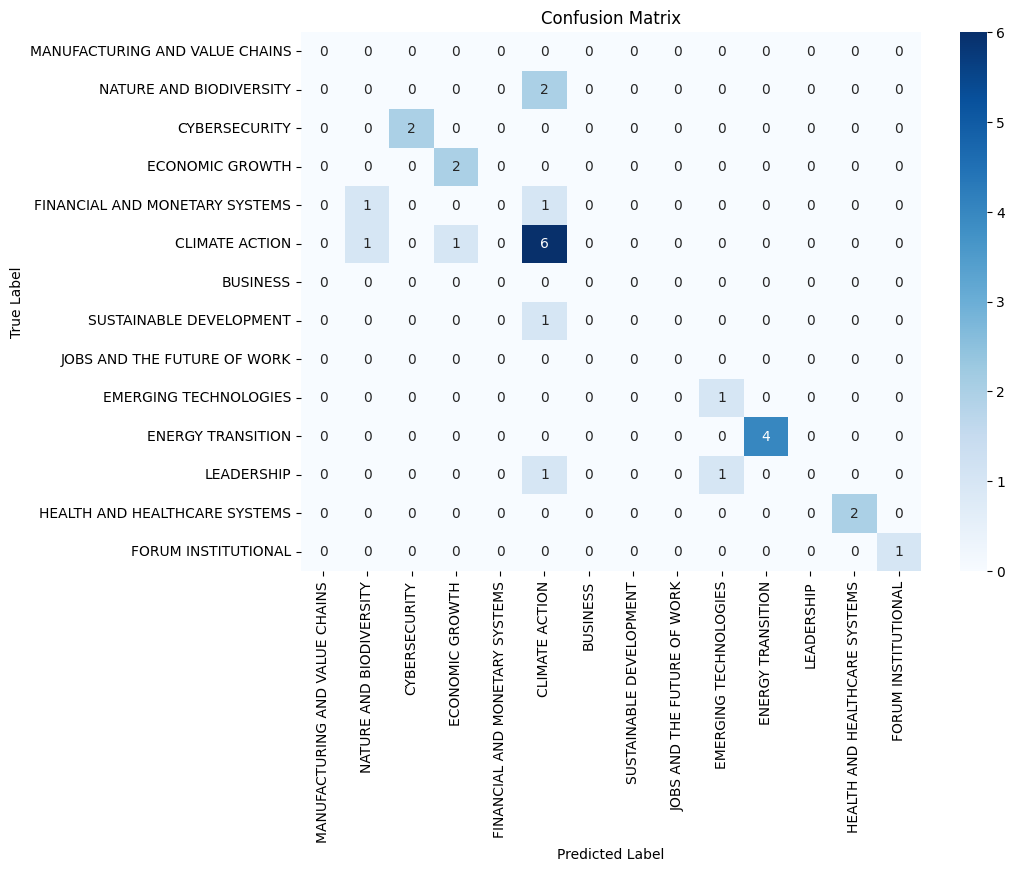

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = lr_clf.predict(X_test_tfidf)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=y_test.unique())

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()